<a href="https://colab.research.google.com/github/manishwai/.github.io/blob/main/ONLINE_SALES_BASIC_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r'/content/Online Shop Customer Sales Data.csv')
pd.set_option('display.max_columns',None)

In [6]:
df.dtypes

Customer_id                int64
Age                        int64
Gender                     int64
Revenue_Total            float64
N_Purchases                int64
Purchase_DATE     datetime64[ns]
Purchase_VALUE           float64
Pay_Method                 int64
Time_Spent                 int64
Browser                    int64
Newsletter                 int64
Voucher                    int64
dtype: object

In [ ]:
df.shape

In [ ]:
df.size

In [ ]:
df.isnull().sum()

In [5]:
df['Purchase_DATE']=pd.to_datetime(df['Purchase_DATE'],format='%d.%m.%y')

# Converting Numerical Values To Categorical Values


Gender = 0: Male, 1: Female
Pay_Method = 0: Digital Wallets, 1: Card, 2: PayPal, 3: Other
Browser = 0: Chrome, 1: Safari, 2: Edge, 3: Other
Newsletter = 0: not subscribed, 1: subscribed
Voucher = 0: not used, 1: used

In [8]:
df.head(5)

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,2021-06-22,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,2021-12-10,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,2021-03-14,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,2021-10-25,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,2021-09-14,56.900,1,605,0,1,0


In [9]:
df.loc[df['Gender']==0,'Gender']='Male'
df.loc[df['Gender']==1,'Gender']='Female'
df.loc[df['Voucher']==0,'Voucher']='Not used'
df.loc[df['Voucher']==1,'Voucher']='used'
df.loc[df['Newsletter']==0,'Newsletter']='not subscribed'
df.loc[df['Newsletter']==1,'Newsletter']='subscribed'

In [11]:
def paymethod(v):
    d={0: 'Digital Wallets', 1: 'Card', 2: 'PayPal', 3: 'Other'}
    return d[v]
df['Pay_Method']=df['Pay_Method'].apply(paymethod)

In [12]:
def Browser_(v):
    d={0:'Chrome', 1:'Safari', 2:'Edge',3:'Other'}
    return d[v]
df['Browser']=df['Browser'].apply(Browser_)

# Pay Method and age group :

In [13]:
def agegroup(v):
    q=v//10
    r=v%10
    if r<5:
        return str(q*10)+'-'+str(q*10+5)
    else:
        return str(q*10+5)+'-'+str(q*10+10)

In [14]:
df['Age_group']=df['Age'].apply(agegroup)

# Questions

**Question1 What Age Group Buys from us the most ?**

In [15]:
df['Age_group'].value_counts().sort_index().reset_index()

,Age_group,count
0,15-20,5376
1,20-25,6741
2,25-30,6906
3,30-35,6798
4,35-40,6857
5,40-45,6827
6,45-50,7023
7,50-55,6964
8,55-60,6774
9,60-65,5530


<Axes: xlabel='Age_group'>

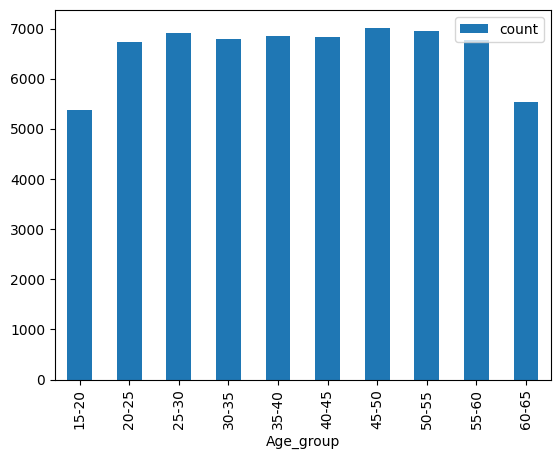

In [18]:
df['Age_group'].value_counts().sort_index().reset_index().plot(kind='bar',x='Age_group',y='count')

**Question2 What Payment Method is used most by Age_Groups**

In [25]:
ndf = df.groupby(['Pay_Method','Age_group']).agg(Total=('Pay_Method','count')).reset_index()
ndf

,Pay_Method,Age_group,Total
0,Card,15-20,1566
1,Card,20-25,2005
2,Card,25-30,2129
3,Card,30-35,2053
4,Card,35-40,2057
5,Card,40-45,2073
6,Card,45-50,2181
7,Card,50-55,2073
8,Card,55-60,1998
9,Card,60-65,1619


**Question3 What Browsers Our Customers use most ?**

In [26]:
df['Browser'].value_counts()

Browser
Chrome    42076
Safari    13135
Other      7208
Edge       3377
Name: count, dtype: int64

**Question4 Best Month For Sale**

In [27]:
df['Month']=df['Purchase_DATE'].dt.month_name()
df['Month_N']=df['Purchase_DATE'].dt.month
df['year']=df['Purchase_DATE'].dt.year
ndf=df.groupby(['Month_N','Month']).agg(
    Monthly_Qty=('Month_N','count'),
    Total_Sale=('Purchase_VALUE','sum'),
    Avg_sale=('Purchase_VALUE','mean')
).reset_index()
ndf

,Month_N,Month,Monthly_Qty,Total_Sale,Avg_sale
0,1,January,5766,91251.475,15.825785
1,2,February,4978,79370.862,15.944327
2,3,March,5453,88831.079,16.290313
3,4,April,5433,85977.834,15.825112
4,5,May,5561,89032.126,16.010093
5,6,June,5421,86601.109,15.975117
6,7,July,5430,87029.272,16.027490
7,8,August,5590,88841.632,15.892957
8,9,September,5505,87013.031,15.806182
9,10,October,5611,90410.203,16.113029


**Highest Orders In Months**

In [28]:
ndf.sort_values(['Monthly_Qty'],ascending=False).iloc[0,:]

Month_N                1
Month            January
Monthly_Qty         5766
Total_Sale     91251.475
Avg_sale       15.825785
Name: 0, dtype: object

 **Highest** **Sale** **In** **Month**

In [29]:
ndf.sort_values(['Total_Sale'],ascending=False).iloc[0,:]

Month_N               12
Month           December
Monthly_Qty         5684
Total_Sale     91641.818
Avg_sale       16.122769
Name: 11, dtype: object

**What is the average time spent by male and female respectively on our Website ?**

In [30]:
df.groupby('Gender')['Time_Spent'].mean()

Gender
Female    599.235647
Male      598.292268
Name: Time_Spent, dtype: float64

**Who are our Best Customers (Males Or Females ?)**

In [33]:
ndf3 = df.groupby('Gender').agg(

    Total_Revenue=('Revenue_Total', 'sum'),
    Average_Revenue=('Revenue_Total', 'mean'),
    Number_of_Purchases=('N_Purchases', 'mean'),
    Average_Time_Spent=('Time_Spent', 'mean')

).sort_values(by='Total_Revenue' , ascending=False).reset_index()
ndf3

,Gender,Total_Revenue,Average_Revenue,Number_of_Purchases,Average_Time_Spent
0,Female,1224554.7,27.722419,3.994544,599.235647
1,Male,600161.5,27.754416,3.988254,598.292268
